In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller


df1=pd.read_excel("/content/velachery_timeseries_Pm2.5.xlsx")

df=df1.copy()

#df.drop(['To Date'],1,inplace=True)


df['From Date']=pd.to_datetime(df['From Date'])


for i in df.columns:
    for j in df[i]:
        if(j=='None'):
            df[i]=df[i].replace(j,np.nan) 


#df=df.dropna(axis=0, subset=['PM2.5']
for col in df:
    df[col] = df[col].interpolate(method='nearest',limit_direction = 'both')




In [0]:
df['From Date']=pd.to_datetime(df['From Date'])

df.set_index(df['From Date'],inplace=True)

df5 = pd.Series(df['PM2.5'])


In [4]:
df5.head()

From Date
2017-01-01 00:00:00    26.97
2017-01-01 01:00:00    34.88
2017-01-01 02:00:00    57.49
2017-01-01 03:00:00    62.75
2017-01-01 04:00:00    67.49
Name: PM2.5, dtype: float64

In [5]:
df.converted      = df5
ts                = df.converted.resample('M', how = 'mean');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


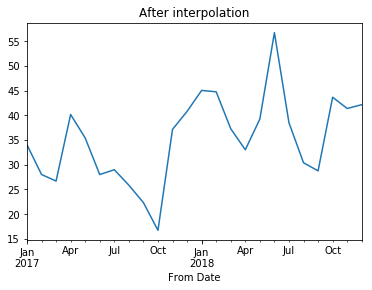

In [6]:
series_imputed1   = ts.interpolate(method = 'linear')
series_imputed1.plot()
plt.title('After interpolation')
plt.show()

In [7]:
df5 = series_imputed1
df5.head()

From Date
2017-01-31    34.039153
2017-02-28    28.011756
2017-03-31    26.677675
2017-04-30    40.150514
2017-05-31    35.407782
Freq: M, Name: PM2.5, dtype: float64

Text(0.5, 0, 'Year')

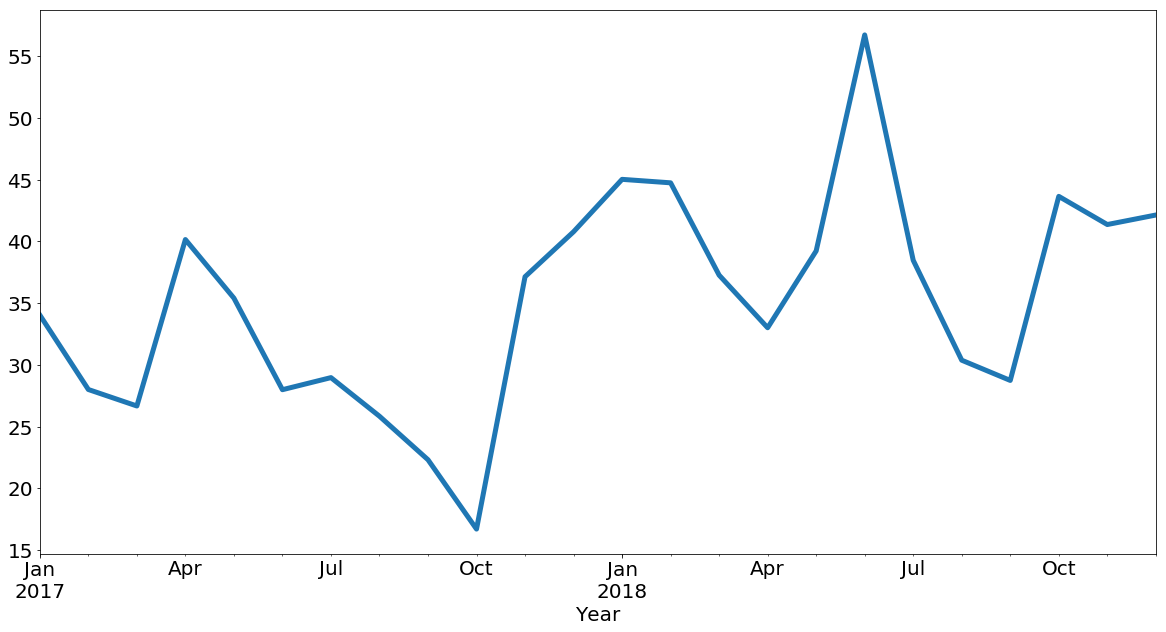

In [8]:
df5.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [0]:
"""df['From Date']=pd.to_datetime(df['From Date'])

df.set_index(df['From Date'],inplace=True)

df5 = pd.Series(df['PM2.5'])


#df5[0:]=df5[0:].astype(float)

df5.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Plot representing PM2.5 data")"""

In [9]:
adf = adfuller(df5) 
print ('Test Statistic: ', adf[0])
print ('pvalue: ', adf[1])

# **From the dicky fuller test we infer that P value is less than 0.05. Hence, our data is stationary which is a necessary criteria to go with ARIMA**



Test Statistic:  -3.2275261015675993
pvalue:  0.018445634545323757


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


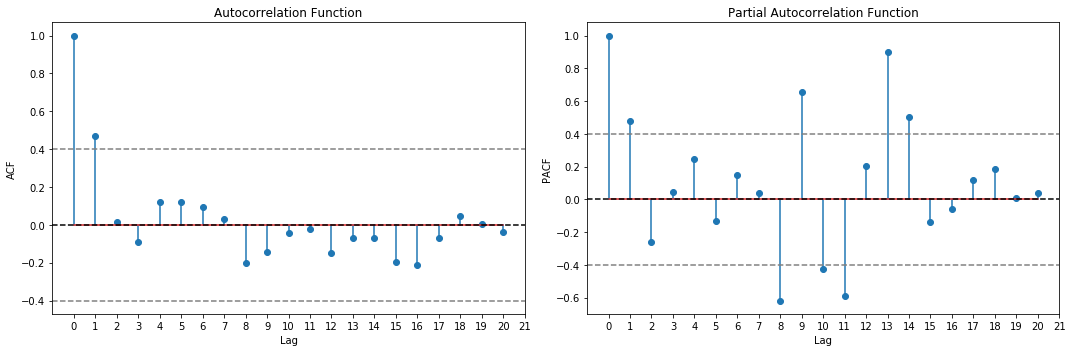

In [20]:
from   statsmodels.tsa.stattools     import acf, pacf
import matplotlib.pyplot             as     plt

lag_acf    =   acf(df5,   nlags = 20)
lag_pacf   =   pacf(df5,  nlags = 20, method = 'ols')

#Plot ACF: 

plt.figure(figsize = (15, 5))
plt.subplot(121) 
plt.stem(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y = -1.96/np.sqrt(len(df5)),linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df5)),linestyle = '--',color = 'gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
#Plot PACF:

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y =-1.96/np.sqrt(len(df5)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df5)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

                              ARMA Model Results                              
Dep. Variable:                  PM2.5   No. Observations:                   24
Model:                     ARMA(1, 1)   Log Likelihood                 -82.237
Method:                       css-mle   S.D. of innovations              7.396
Date:                Thu, 26 Sep 2019   AIC                            172.474
Time:                        11:27:10   BIC                            177.186
Sample:                    01-31-2017   HQIC                           173.724
                         - 12-31-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.3795      2.562     13.811      0.000      30.359      40.400
ar.L1.PM2.5     0.2323      0.301      0.772      0.449      -0.357       0.822
ma.L1.PM2.5     0.3311      0.266      1.246    

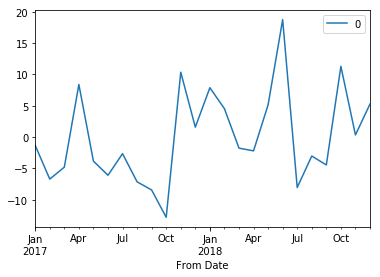

In [21]:
df5_ar = ARIMA(df5, order=(1,0,1))
df5_arma = df5_ar.fit(disp=0)

print(df5_arma.summary())


resids = pd.DataFrame(df5_arma.resid)

resids.plot();

print(resids.describe())



         obs        est
1  28.011756  34.735885
2  26.677675  31.501489
3  40.150514  31.765895
4  35.407782  39.263092
5  27.995847  34.109527
          obs        est
19  30.383051  33.426115
20  28.745167  33.211446
21  43.646290  32.359779
22  41.365458  41.036780
23  42.135511  36.878595


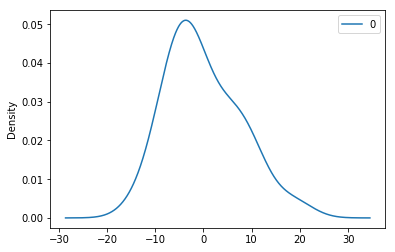

In [23]:
resids.plot(kind='kde')

colnames = ['obs', 'est']
data = pd.DataFrame(columns = colnames)

for t in range(1, len(df5)):
    obs = df5[t].item()
    est = df5_arma.predict(start=t, end=t).item()
    dfrow = pd.DataFrame({'obs':obs, 'est':est}, index=[t])
    data = data.append(dfrow)

print(data.head())
print(data.tail())



array([38.68932458, 36.14822735, 35.55805739, 35.42099039, 35.38915657,
       35.38176316, 35.38004604, 35.37964724, 35.37955462, 35.37953311,
       35.37952811, 35.37952695])

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


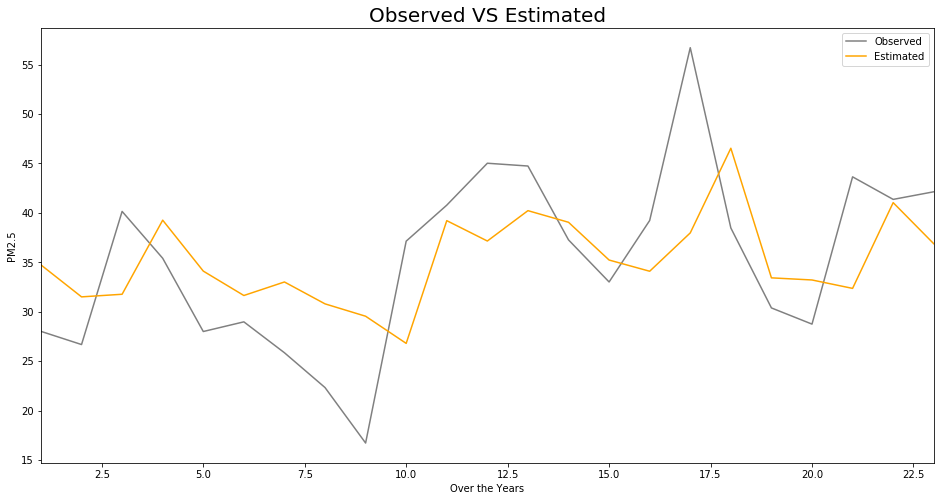

In [24]:
plt.figure(figsize=(16,8))
data.obs.plot(color='gray', label ='Observed')
data.est.plot(color='orange',label ='Estimated')
plt.title('Observed VS Estimated', family = 'Arial', fontsize = 20)
plt.ylabel('PM2.5')
plt.xlabel('Over the Years')
plt.legend(loc='best')
df5_arma.forecast(steps=12)[0]


## **Till now Forecasted for next 24 hours**

In [25]:
from sklearn.metrics import mean_squared_error

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,3)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

rmse             =   np.sqrt(mean_squared_error(data['obs'], data['est']))
mape             =   MAPE(data['obs'], data['est'])
print("RMSE: ",rmse)
print("MAPE: ",mape)


RMSE:  7.554889005668194
MAPE:  17.965


In [0]:
df5.head()

From Date
2017-01-01 00:00:00    26.97
2017-01-01 01:00:00    34.88
2017-01-01 02:00:00    57.49
2017-01-01 03:00:00    62.75
2017-01-01 04:00:00    67.49
Name: PM2.5, dtype: float64

In [0]:
k=df5_arma.forecast(steps=12)[0]

In [27]:
ans=pd.DataFrame(k)
ans.columns=['PM2.5']
ans.head()

,PM2.5
0,38.689325
1,36.148227
2,35.558057
3,35.420990
4,35.389157


In [0]:
ans.to_csv('monthly_output_forecast_pm2.5_up.csv')